### **Problem Statement​**

Millions of people worldwide are impacted by skin diseases, which adversely affect both physical health and quality of life. Early and accurate diagnosis of these conditions is essential but often challenging due to the limited availability of specialized medical expertise. This challenge is particularly pronounced in remote and underserved areas where access to specialized care for skin diseases is limited or non-existent. Developing an automated system for image analysis can greatly improve early diagnostic capabilities by reducing the burden on healthcare professionals and providing critical support in regions where specialized care is lacking. Such systems could offer more equitable healthcare access and significantly enhance outcomes for those affected by skin diseases.

### **Architecture Diagram​**

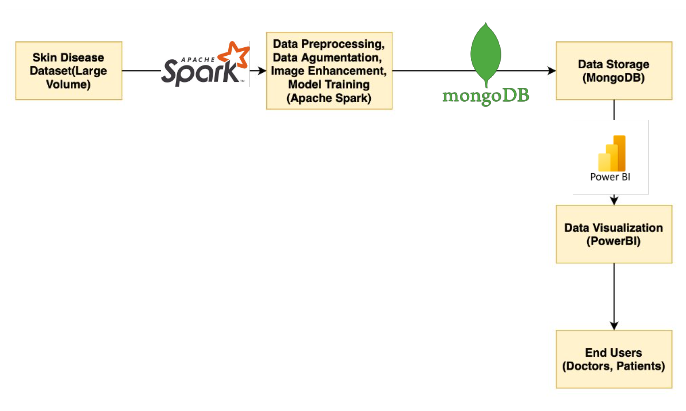

### **Code:**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,756 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,077 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:13 https://ppa.launch

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


In [ ]:
!pip install findspark


In [ ]:
import findspark
findspark.init()


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivashankarkanike","key":"5c2030e73234cd396819fa28af8720c0"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d mohdshadab23/skin-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/mohdshadab23/skin-disease-dataset
License(s): unknown
100% 15.0G/15.0G [01:45<00:00, 190MB/s]
100% 15.0G/15.0G [01:45<00:00, 152MB/s]


In [ ]:
!unzip skin-disease-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-49.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-5.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-50.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-51.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-52.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-53.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-54.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-55.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-56.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-58.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-6.jpg  
  inflating: Dataset/Tinea_Ringworm_Candidiasis/t-tinea-foot-dorsum-61.jpg  
  inflating: Dataset/Tinea_

In [ ]:
# Install necessary libraries
!pip install numpy matplotlib tensorflow

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


                              Class  Count
0                  Melanocytic_Nevi  13268
1                          Melanoma   7778
2  Psoriasis_pictures_Lichen_Planus   3460
3              Seborrheic_Keratoses   3308
4                   Warts_Molluscum   3189
5              Basal_Cell_Carcinoma   3143
6        Tinea_Ringworm_Candidiasis   3002
7                            Eczema   2912
8     Benign_Keratosis_like_Lesions   2417
9                 Atopic_Dermatitis   1746


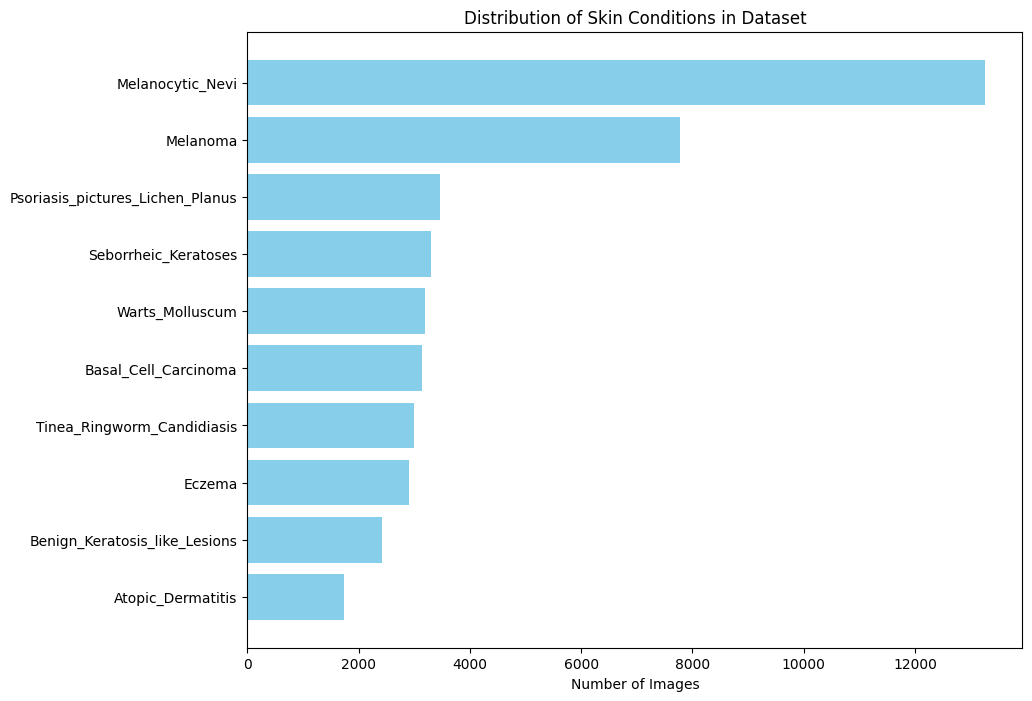

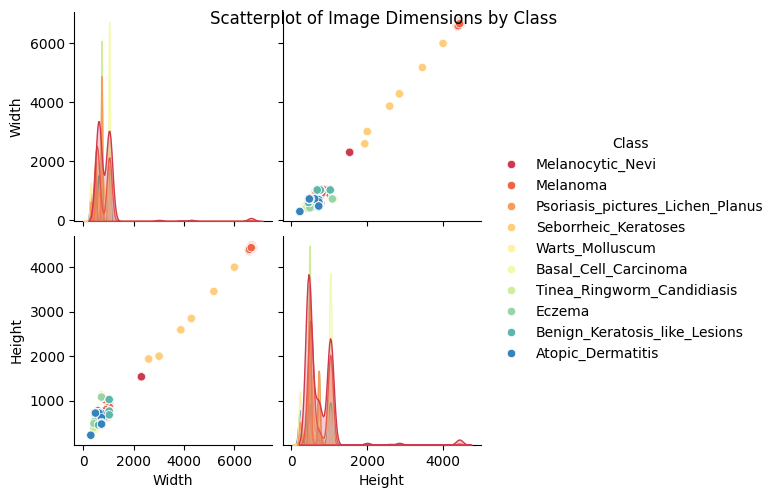

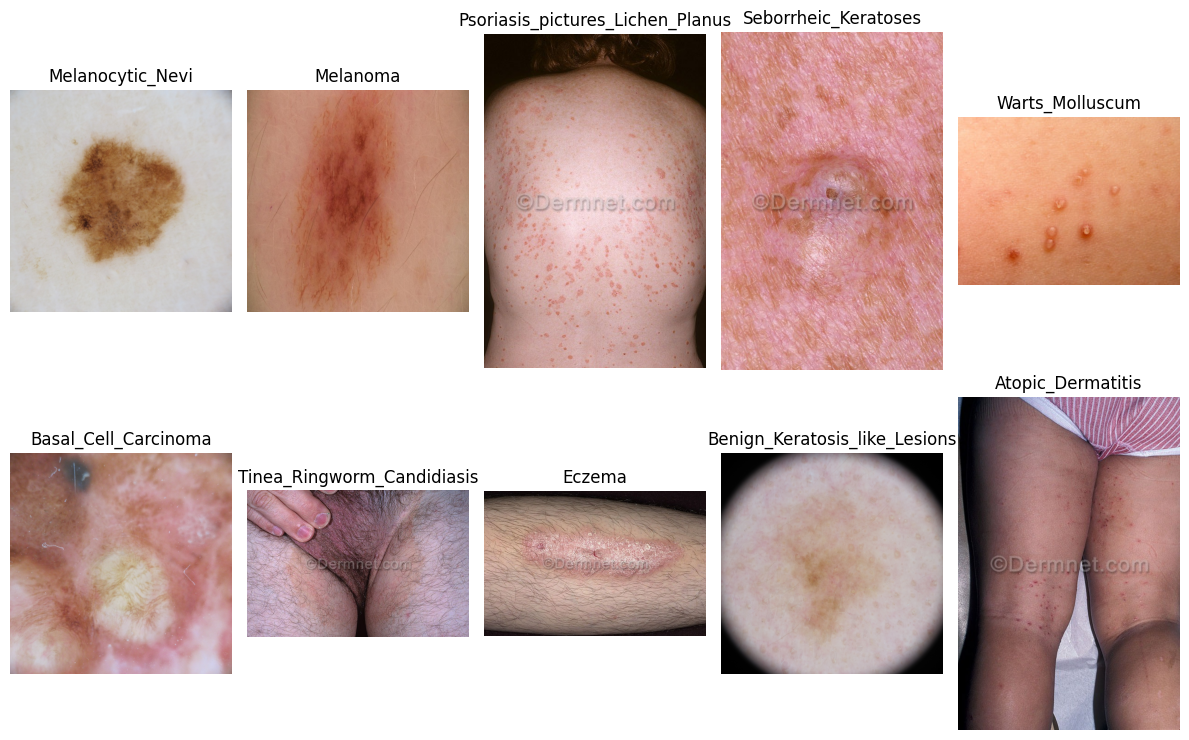

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

def count_classes(path):
    # Dictionary comprehension to count files in each subdirectory
    classes_dict = {class_name: len(os.listdir(os.path.join(path, class_name)))
                    for class_name in os.listdir(path)
                    if os.path.isdir(os.path.join(path, class_name))}
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(list(classes_dict.items()), columns=['Class', 'Count'])
    df = df.sort_values(by='Count', ascending=False).reset_index(drop=True)
    return df

def analyze_image_sizes(path, classes):
    # Collect image dimensions across classes
    dimensions = []
    for class_name in classes:
        class_dir = os.path.join(path, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            with Image.open(image_path) as img:
                dimensions.append((*img.size, class_name))
    # Convert to DataFrame
    dimensions_df = pd.DataFrame(dimensions, columns=['Width', 'Height', 'Class'])
    return dimensions_df

def plot_sample_images(path, classes):
    plt.figure(figsize=(12, 8))
    for i, class_name in enumerate(classes, 1):
        class_dir = os.path.join(path, class_name)
        image_name = os.listdir(class_dir)[0]  # Get the first image
        image_path = os.path.join(class_dir, image_name)
        img = Image.open(image_path)
        plt.subplot(2, 5, i)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Set the base directory for the dataset
dataset_dir = '/content/Dataset'

# Get class counts
class_count = count_classes(dataset_dir)
print(class_count)

# Plot distribution of classes
plt.figure(figsize=(10, 8))
plt.barh(class_count['Class'], class_count['Count'], color='skyblue')
plt.xlabel('Number of Images')
plt.title('Distribution of Skin Conditions in Dataset')
plt.gca().invert_yaxis()
plt.show()

# Analyze and plot image sizes
dimensions_df = analyze_image_sizes(dataset_dir, class_count['Class'])
sns.pairplot(dimensions_df, hue='Class', kind='scatter', palette='Spectral')
plt.suptitle('Scatterplot of Image Dimensions by Class')
plt.show()

# Display sample images
plot_sample_images(dataset_dir, class_count['Class'])


In [ ]:
import os
import pandas as pd

def count_classes(path):
    classes_dict = {class_name: len(os.listdir(os.path.join(path, class_name)))
                    for class_name in os.listdir(path)
                    if os.path.isdir(os.path.join(path, class_name))}
    df = pd.DataFrame(classes_dict, index=['Count']).transpose().sort_values(by='Count', ascending=False)
    return df

dataset_dir = '/content/Dataset'

class_count = count_classes(dataset_dir)
print(class_count)


                                  Count
Melanocytic_Nevi                  13268
Melanoma                           7778
Psoriasis_pictures_Lichen_Planus   3460
Seborrheic_Keratoses               3308
Warts_Molluscum                    3189
Basal_Cell_Carcinoma               3143
Tinea_Ringworm_Candidiasis         3002
Eczema                             2912
Benign_Keratosis_like_Lesions      2417
Atopic_Dermatitis                  1746


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Paths to the dataset
dataset_dir = '/content/Dataset'
train_dir = '/content/Train'
test_dir = '/content/Test'

# Create Train and Test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the split size for test
test_size = 0.2  # 20% for test set

# Function to split data
def split_data(dataset_dir, train_dir, test_dir, test_size):
    for class_name in os.listdir(dataset_dir):
        class_dir = os.path.join(dataset_dir, class_name)
        # Check if it's a directory
        if os.path.isdir(class_dir):
            # List images
            images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)]
            # Split into train and test sets
            train_images, test_images = train_test_split(images, test_size=test_size)
            # Make new class directories in train and test
            train_class_dir = os.path.join(train_dir, class_name)
            test_class_dir = os.path.join(test_dir, class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)
            # Copy images to their respective directories
            for img in train_images:
                shutil.copy(img, train_class_dir)
            for img in test_images:
                shutil.copy(img, test_class_dir)
            print(f"Processed {class_name}: {len(train_images)} for training, {len(test_images)} for testing")

# Run the function
split_data(dataset_dir, train_dir, test_dir, test_size)


Processed Basal_Cell_Carcinoma: 2514 for training, 629 for testing
Processed Psoriasis_pictures_Lichen_Planus: 2768 for training, 692 for testing
Processed Warts_Molluscum: 2551 for training, 638 for testing
Processed Melanoma: 6222 for training, 1556 for testing
Processed Atopic_Dermatitis: 1396 for training, 350 for testing
Processed Eczema: 2329 for training, 583 for testing
Processed Seborrheic_Keratoses: 2646 for training, 662 for testing
Processed Tinea_Ringworm_Candidiasis: 2401 for training, 601 for testing
Processed Benign_Keratosis_like_Lesions: 1933 for training, 484 for testing
Processed Melanocytic_Nevi: 10614 for training, 2654 for testing


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def initialize_generator():
    """Sets up an image data generator with consistent augmentation settings."""
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

def apply_augmentation(image_path, save_directory, generator, augment_count=5):
    """Augments a single image and stores the results in a target directory."""
    try:
        # Load and convert the image for augmentation
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(256, 256))  # Modify size if required
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        image_array = np.expand_dims(image_array, axis=0)

        # Generator to save augmented images
        image_generator = generator.flow(
            image_array,
            batch_size=1,
            save_to_dir=save_directory,
            save_prefix='aug',
            save_format='jpg'
        )

        # Produce the specified number of augmented images
        for _ in range(augment_count):
            next(image_generator)

    except Exception as err:
        print(f"Error processing image {image_path}: {err}")

def process_folder(folder_name, src_base, dest_base, generator, augment_count=5):
    """Processes all images in a specific disease folder, augmenting them."""
    source_folder = os.path.join(src_base, folder_name)
    destination_folder = os.path.join(dest_base, folder_name)

    if os.path.isdir(source_folder):
        os.makedirs(destination_folder, exist_ok=True)

        # Collect all JPEG images in the folder
        image_files = [os.path.join(source_folder, fname) for fname in os.listdir(source_folder) if fname.lower().endswith('.jpg')]

        # Process each image file and augment
        for image_file in image_files:
            apply_augmentation(image_file, destination_folder, generator, augment_count)

        print(f"Data augmentation complete for disease: {folder_name}. Processed {len(image_files)} original images. Augmented images: {augment_count * len(image_files)}")
    else:
        print(f"Input directory does not exist: {source_folder}")

def execute_augmentation():
    """Main function to manage the entire data augmentation process."""
    input_base_dir = "/content/Train"
    output_base_dir = "/content/augmented_Train"

    os.makedirs(output_base_dir, exist_ok=True)

    generator = initialize_generator()

    # Process each disease folder for augmentation
    for folder in os.listdir(input_base_dir):
        process_folder(folder, input_base_dir, output_base_dir, generator)

    print("Data augmentation has been completed on all folders.")

if __name__ == "__main__":
    execute_augmentation()


Data augmentation complete for disease: Basal_Cell_Carcinoma. Processed 2514 original images. Augmented images: 12570
Data augmentation complete for disease: Psoriasis_pictures_Lichen_Planus. Processed 2768 original images. Augmented images: 13840
Data augmentation complete for disease: Warts_Molluscum. Processed 2551 original images. Augmented images: 12755
Data augmentation complete for disease: Melanoma. Processed 6222 original images. Augmented images: 31110
Data augmentation complete for disease: Atopic_Dermatitis. Processed 1396 original images. Augmented images: 6980
Data augmentation complete for disease: Eczema. Processed 2329 original images. Augmented images: 11645
Data augmentation complete for disease: Seborrheic_Keratoses. Processed 2646 original images. Augmented images: 13230
Data augmentation complete for disease: Tinea_Ringworm_Candidiasis. Processed 2401 original images. Augmented images: 12005
Data augmentation complete for disease: Benign_Keratosis_like_Lesions. Pr

In [ ]:
def handle_test_augmentation():
    """Sets up data augmentation for the test dataset."""
    input_test_dir = "/content/Test"
    output_test_dir = "/content/augmented_Test"

    os.makedirs(output_test_dir, exist_ok=True)

    generator = initialize_generator()

    # Iterate through each disease folder and apply the augmentation
    for disease_folder in os.listdir(input_test_dir):
        process_folder(disease_folder, input_test_dir, output_test_dir, generator)

    print("Data augmentation has been completed on all folders.")

if __name__ == "__main__":
    handle_test_augmentation()


Data augmentation complete for disease: Basal_Cell_Carcinoma. Processed 629 original images. Augmented images: 3145
Data augmentation complete for disease: Psoriasis_pictures_Lichen_Planus. Processed 692 original images. Augmented images: 3460
Data augmentation complete for disease: Warts_Molluscum. Processed 638 original images. Augmented images: 3190
Data augmentation complete for disease: Melanoma. Processed 1556 original images. Augmented images: 7780
Data augmentation complete for disease: Atopic_Dermatitis. Processed 350 original images. Augmented images: 1750
Data augmentation complete for disease: Eczema. Processed 583 original images. Augmented images: 2915
Data augmentation complete for disease: Seborrheic_Keratoses. Processed 662 original images. Augmented images: 3310
Data augmentation complete for disease: Tinea_Ringworm_Candidiasis. Processed 601 original images. Augmented images: 3005
Data augmentation complete for disease: Benign_Keratosis_like_Lesions. Processed 484 or

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    "/content/augmented_Train",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    "/content/augmented_Test",
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 73819 images belonging to 10 classes.
Found 32675 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, Callback  # Import ModelCheckpoint and Callback
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Custom callback to upload files to Google Drive
class UploadToDriveCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 5 == 0:  # Check if it's the right epoch to save
            file_path = f'/content/drive/My Drive/model_epoch_{epoch+1:02d}.hdf5'
            self.model.save(file_path)
            print(f"Model saved and uploaded to {file_path}")

# Setup the checkpoint
checkpoint = ModelCheckpoint(
    'model_epoch_{epoch:02d}.hdf5',
    save_freq='epoch',
    period=5,
    save_best_only=False
)

# Train the model with the ModelCheckpoint and UploadToDriveCallback
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator,
    callbacks=[checkpoint, UploadToDriveCallback()]  # Add the checkpoint and upload callback to the callbacks
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/100
2307/2307 [==============================] - 462s 197ms/step - loss: 3.8840 - accuracy: 0.2543 - val_loss: 2.3361 - val_accuracy: 0.2851
Epoch 2/100
2307/2307 [==============================] - 450s 195ms/step - loss: 1.7967 - accuracy: 0.2870 - val_loss: 3.6642 - val_accuracy: 0.2070
Epoch 3/100
2307/2307 [==============================] - 451s 195ms/step - loss: 1.7141 - accuracy: 0.3074 - val_loss: 2.5702 - val_accuracy: 0.2826
Epoch 4/100
2307/2307 [==============================] - 452s 196ms/step - loss: 1.6338 - accuracy: 0.3341 - val_loss: 2.1122 - val_accuracy: 0.3610
Epoch 5/100
2307/2307 [==============================] - ETA: 0s - loss: 1.5864 - accuracy: 0.3509

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved and uploaded to /content/drive/My Drive/model_epoch_05.hdf5
2307/2307 [==============================] - 455s 197ms/step - loss: 1.5864 - accuracy: 0.3509 - val_loss: 2.0163 - val_accuracy: 0.3215
Epoch 6/100
2307/2307 [==============================] - 451s 196ms/step - loss: 1.5470 - accuracy: 0.3660 - val_loss: 1.4049 - val_accuracy: 0.4259
Epoch 7/100
2307/2307 [==============================] - 453s 196ms/step - loss: 1.5099 - accuracy: 0.3816 - val_loss: 2.1836 - val_accuracy: 0.3228
Epoch 8/100
2307/2307 [==============================] - 456s 197ms/step - loss: 1.4895 - accuracy: 0.3907 - val_loss: 1.7159 - val_accuracy: 0.3653
Epoch 9/100
2307/2307 [==============================] - 454s 197ms/step - loss: 1.4701 - accuracy: 0.3975 - val_loss: 1.6829 - val_accuracy: 0.4239
Epoch 10/100
2307/2307 [==============================] - 456s 197ms/step - loss: 1.4393 - accuracy: 0.4160 - val_loss: 1.3024 - val_accuracy: 0.4736
Epoch 11/100
2307/2307 [=====================

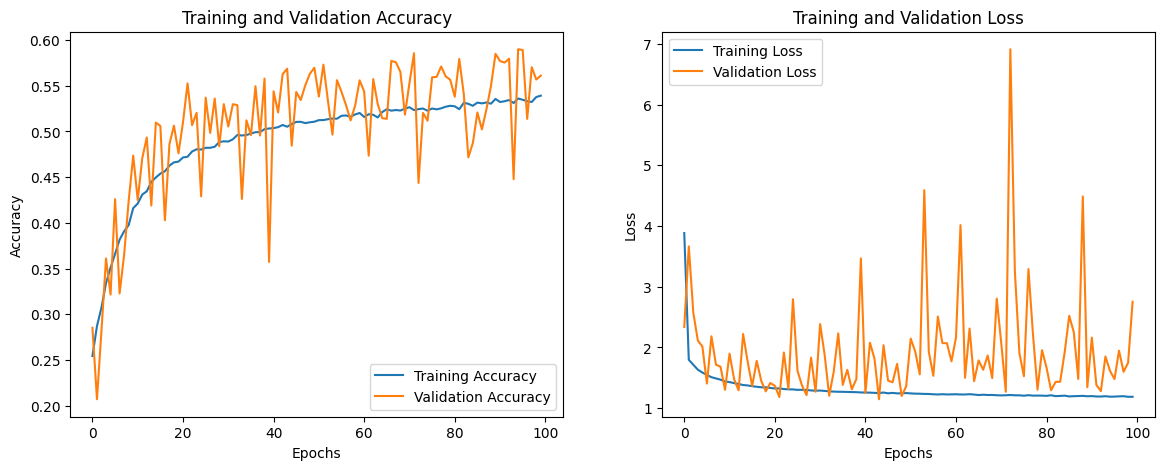

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the training history: accuracy
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training history: loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
model.save('/content/skin_disease_model.h5')


1022/1022 [==============================] - 32s 31ms/step


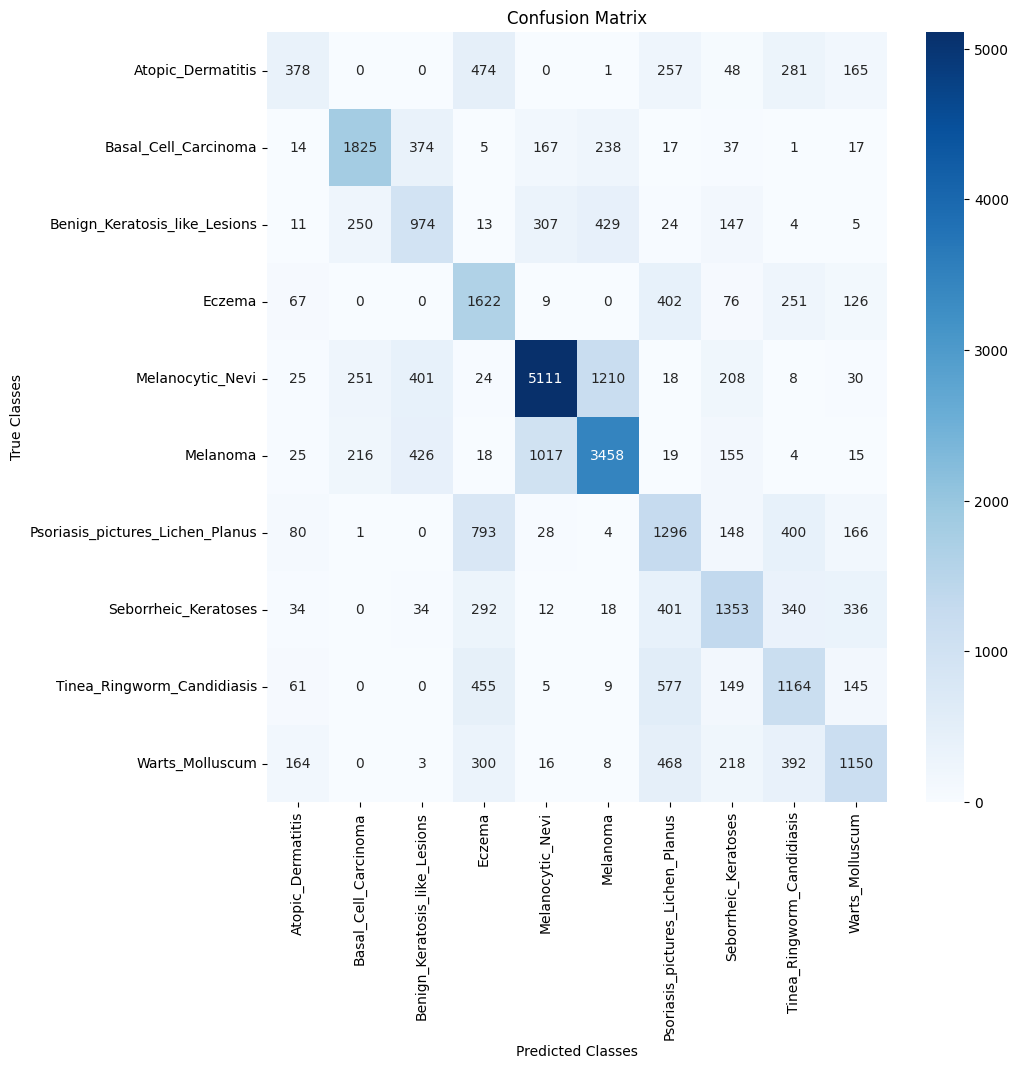

                                  precision    recall  f1-score   support

               Atopic_Dermatitis       0.44      0.24      0.31      1604
            Basal_Cell_Carcinoma       0.72      0.68      0.70      2695
   Benign_Keratosis_like_Lesions       0.44      0.45      0.45      2164
                          Eczema       0.41      0.64      0.50      2553
                Melanocytic_Nevi       0.77      0.70      0.73      7286
                        Melanoma       0.64      0.65      0.64      5353
Psoriasis_pictures_Lichen_Planus       0.37      0.44      0.41      2916
            Seborrheic_Keratoses       0.53      0.48      0.50      2820
      Tinea_Ringworm_Candidiasis       0.41      0.45      0.43      2565
                 Warts_Molluscum       0.53      0.42      0.47      2719

                        accuracy                           0.56     32675
                       macro avg       0.53      0.51      0.51     32675
                    weighted avg    

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the saved model
model = load_model('/content/skin_disease_model.h5')

# Predict the test set
test_generator.reset()  # Resetting the generator is important before calling predict_generator
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels
true_classes = test_generator.classes

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.show()

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=list(test_generator.class_indices.keys())))

# Save the results
import pandas as pd

# Prepare DataFrame with the filenames, true labels, predicted labels, and probabilities
results = pd.DataFrame({
    'Filename': test_generator.filenames,
    'True Label': true_classes,
    'Predicted Label': predicted_classes,
    'Probabilities': np.max(predictions, axis=1)
})

# Save to CSV
results.to_csv('/content/test_predictions.csv', index=False)


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1022/1022 [==============================] - 30s 29ms/step - loss: 2.7529 - accuracy: 0.5610
Test accuracy: 56.10%


In [ ]:
import os
drive_path = f'/content/drive/My Drive/test_predictions.csv'
os.system(f'cp "/content/test_predictions.csv" "{drive_path}"')
print(f"File uploaded to Google Drive at {drive_path}")

File uploaded to Google Drive at /content/drive/My Drive/test_predictions.csv


### **MongoDB Connection**

In [ ]:
# Import necessary libraries
!pip install pymongo
import pymongo
import pandas as pd

# Establish a connection to the MongoDB server
client = pymongo.MongoClient("mongodb://localhost:27017")

# Load the data from a CSV file
data_frame = pd.read_csv("/content/test_predictions.csv")
print(data_frame.head())  # Display the first few rows of the dataframe

# Convert the DataFrame to a list of dictionaries suitable for insertion into MongoDB
records = data_frame.to_dict(orient="records")
print(records)  # Display the records that will be inserted

# Connect to the specific MongoDB database
database = client["Skin_Model_Predictions"]
print(database)  # Print the database object to confirm connection

# Access the collection where predictions will be stored
collection = database["Skin_Images_Predictions"]

# Insert the records into the MongoDB collection
collection.insert_many(records)

                         Filename  True_Label  Predicted_Class  \
0  Warts_Molluscum/aug_0_9901.jpg           9                9   
1  Warts_Molluscum/aug_0_9902.jpg           9                8   
2  Warts_Molluscum/aug_0_9905.jpg           9                9   
3  Warts_Molluscum/aug_0_9906.jpg           9                8   
4  Warts_Molluscum/aug_0_9907.jpg           9                3   

                                       Probabilities  Predicted_Probability  \
0  [0.08178418129682541, 7.602225196023937e-07, 1...               0.242842   
1  [0.04693827033042908, 1.2923398516693357e-13, ...               0.426975   
2  [0.053587667644023895, 3.2826942119451585e-12,...               0.333627   
3  [0.01257180143147707, 7.149535645417204e-16, 1...               0.361566   
4  [0.09447985887527466, 2.015692057710794e-09, 5...               0.250154   

   Correct  
0     True  
1    False  
2     True  
3    False  
4    False  


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



InsertManyResult([ObjectId('66383fb0d72e892e8e241f9c'), ObjectId('66383fb0d72e892e8e241f9d'), ObjectId('66383fb0d72e892e8e241f9e'), ObjectId('66383fb0d72e892e8e241f9f'), ObjectId('66383fb0d72e892e8e241fa0'), ObjectId('66383fb0d72e892e8e241fa1'), ObjectId('66383fb0d72e892e8e241fa2'), ObjectId('66383fb0d72e892e8e241fa3'), ObjectId('66383fb0d72e892e8e241fa4'), ObjectId('66383fb0d72e892e8e241fa5'), ObjectId('66383fb0d72e892e8e241fa6'), ObjectId('66383fb0d72e892e8e241fa7'), ObjectId('66383fb0d72e892e8e241fa8'), ObjectId('66383fb0d72e892e8e241fa9'), ObjectId('66383fb0d72e892e8e241faa'), ObjectId('66383fb0d72e892e8e241fab'), ObjectId('66383fb0d72e892e8e241fac'), ObjectId('66383fb0d72e892e8e241fad'), ObjectId('66383fb0d72e892e8e241fae'), ObjectId('66383fb0d72e892e8e241faf'), ObjectId('66383fb0d72e892e8e241fb0'), ObjectId('66383fb0d72e892e8e241fb1'), ObjectId('66383fb0d72e892e8e241fb2'), ObjectId('66383fb0d72e892e8e241fb3'), ObjectId('66383fb0d72e892e8e241fb4'), ObjectId('66383fb0d72e892e8e241f

In [ ]:
print(client)

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


In [ ]:
print(collection)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Skin_Model_Predictions'), 'Skin_Images_Predictions')


In [ ]:
print(records[15])

{'Filename': 'Warts_Molluscum/aug_0_9951.jpg', 'True_Label': 9, 'Predicted_Class': 9, 'Probabilities': '[0.01582110859453678, 9.025693061860685e-13, 9.643928988722905e-10, 0.030842609703540802, 1.899736012944686e-08, 2.83364354203286e-09, 0.07987497746944427, 0.21811023354530334, 0.24465623497962952, 0.41069483757019043]', 'Predicted_Probability': 0.41069484, 'Correct': True, '_id': ObjectId('66383fb0d72e892e8e241fab')}


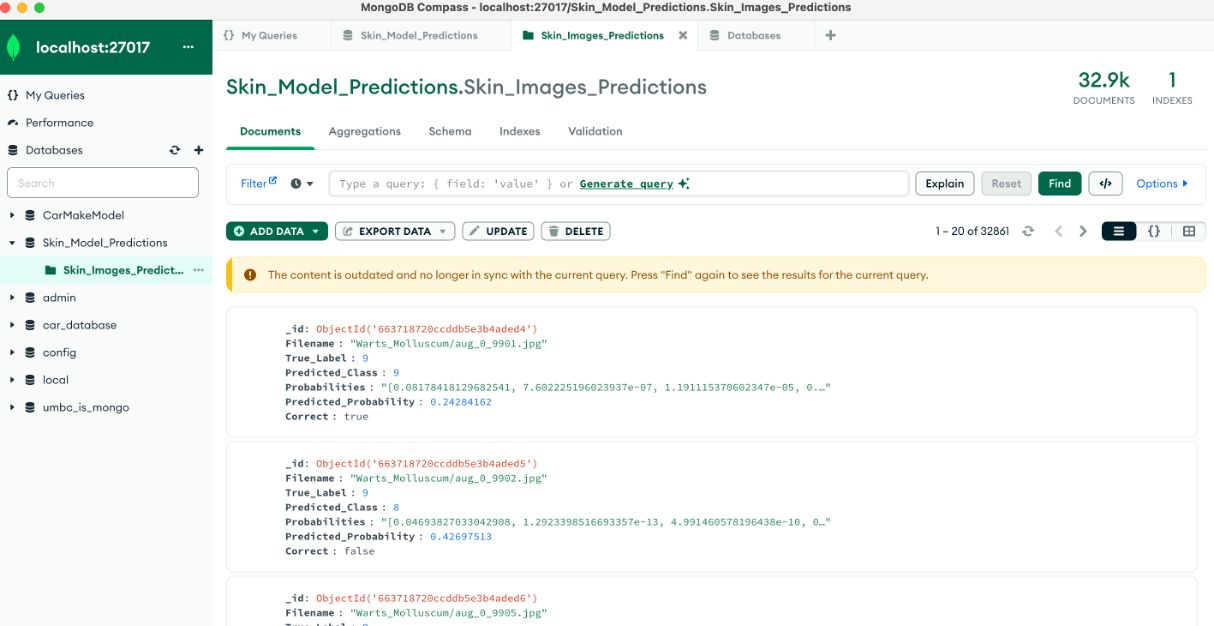

### **Model Testing Using Streamlit Framework**

# ***Below code should be runned in seperate python file***

In [ ]:
import os
import streamlit as st
from PIL import Image
import numpy as np
import tensorflow as tf

# Define the path to the model and check its existence
model_path = '/Users/sridharkandi/Downloads/skin_disease_model.h5'
if not os.path.exists(model_path):
    raise FileNotFoundError(f"The specified model was not found at {model_path}")

@st.cache_data
def load_model():
    """Loads and returns a Keras model."""
    return tf.keras.models.load_model(model_path)

# Load the model
model = load_model()

# Define class names based on your model training
class_names = ['Atopic Dermatitis', 'Basal Cell Carcinoma', 'Benign Keratosis-like Lesions', 'Eczema',
               'Melanocytic Nevi', 'Melanoma', 'Psoriasis and Lichen Planus', 'Seborrheic Keratoses',
               'Tinea Ringworm Candidiasis', 'Warts Molluscum']

def load_image(image_file):
    """Loads an image from a file in RGB format."""
    return Image.open(image_file).convert('RGB')

def predict(image):
    """Preprocesses the image and predicts the class."""
    # Resize the image to the expected input size of the model
    image = image.resize((150, 150))

    # Convert the image to a numpy array and normalize it if required
    image_array = np.array(image)[np.newaxis, :] / 255.0

    # Debug: Check the shape of the input
    st.write("Image shape for prediction:", image_array.shape)

    # Make a prediction
    prediction = model.predict(image_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    return class_names[predicted_class_index]

# Streamlit UI
st.title('Skin Disease Recognition App')

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"], key="file_uploader")

if uploaded_file is not None:
    # if 'file_uploaded' not in st.session_state or st.session_state.file_uploaded != uploaded_file:
    #     st.session_state.file_uploaded = uploaded_file
    #     st.session_state.label = None  # Reset label on new upload

    image = load_image(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Recognizing...")
    if 'label' not in st.session_state:
        st.session_state.label = predict(image)
    st.write(f'Prediction: {st.session_state.label}')

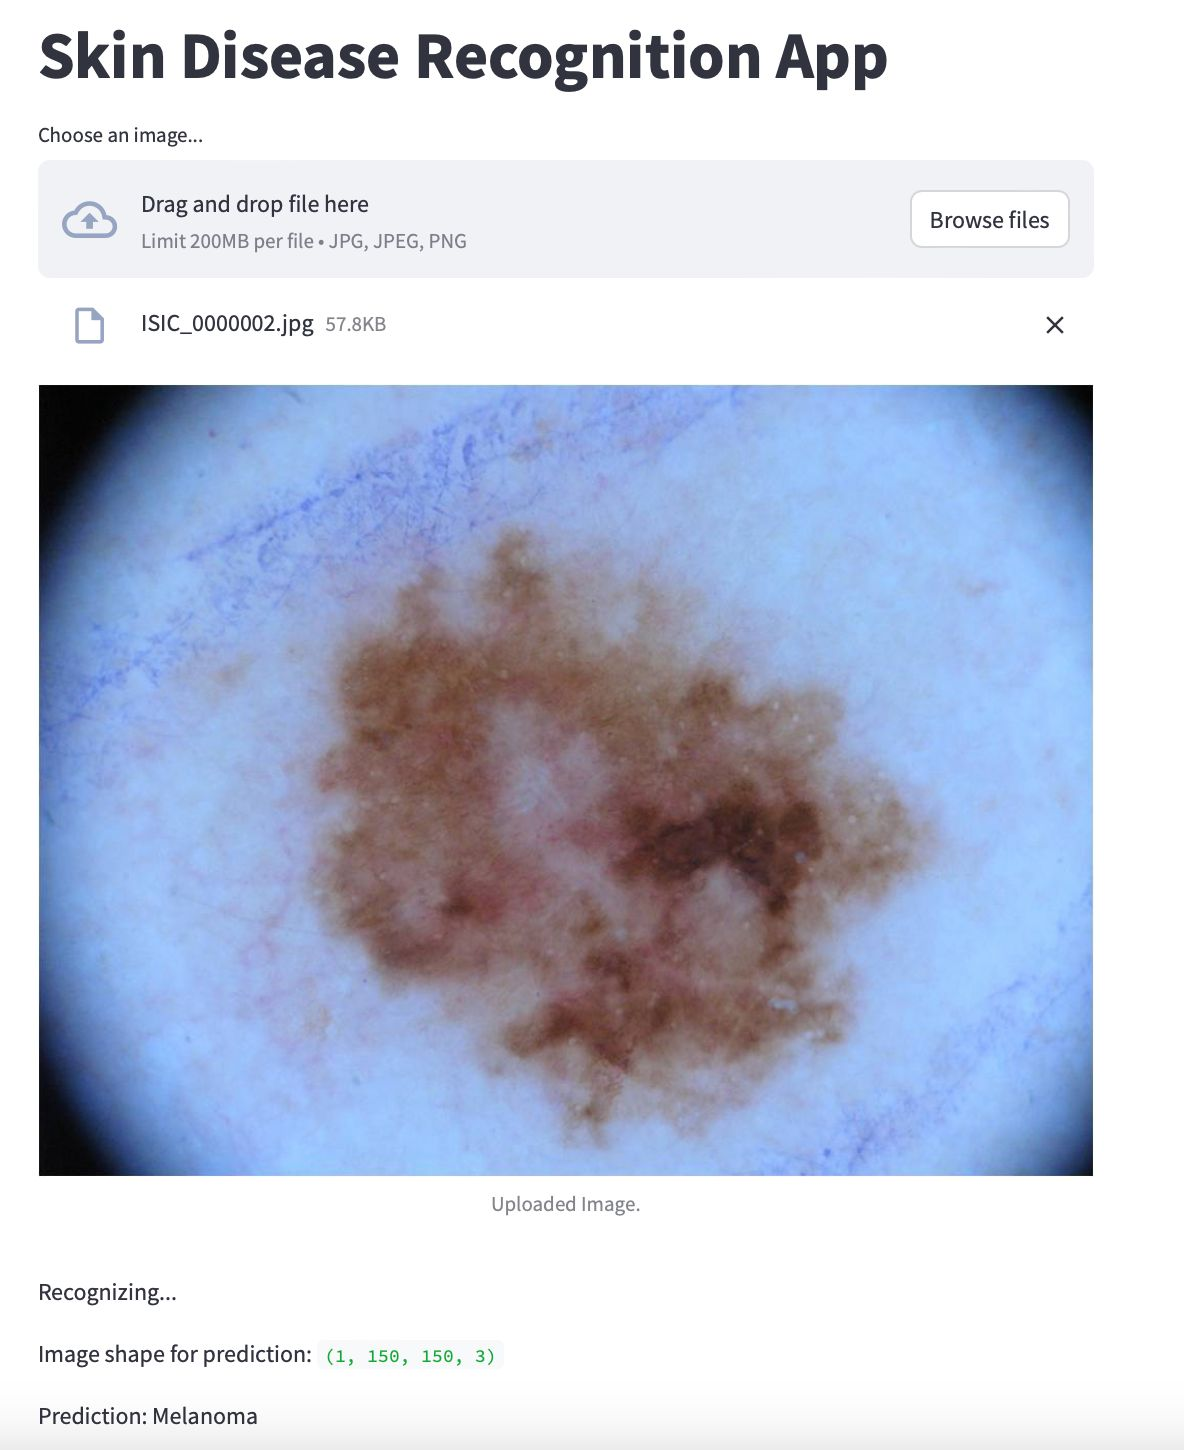

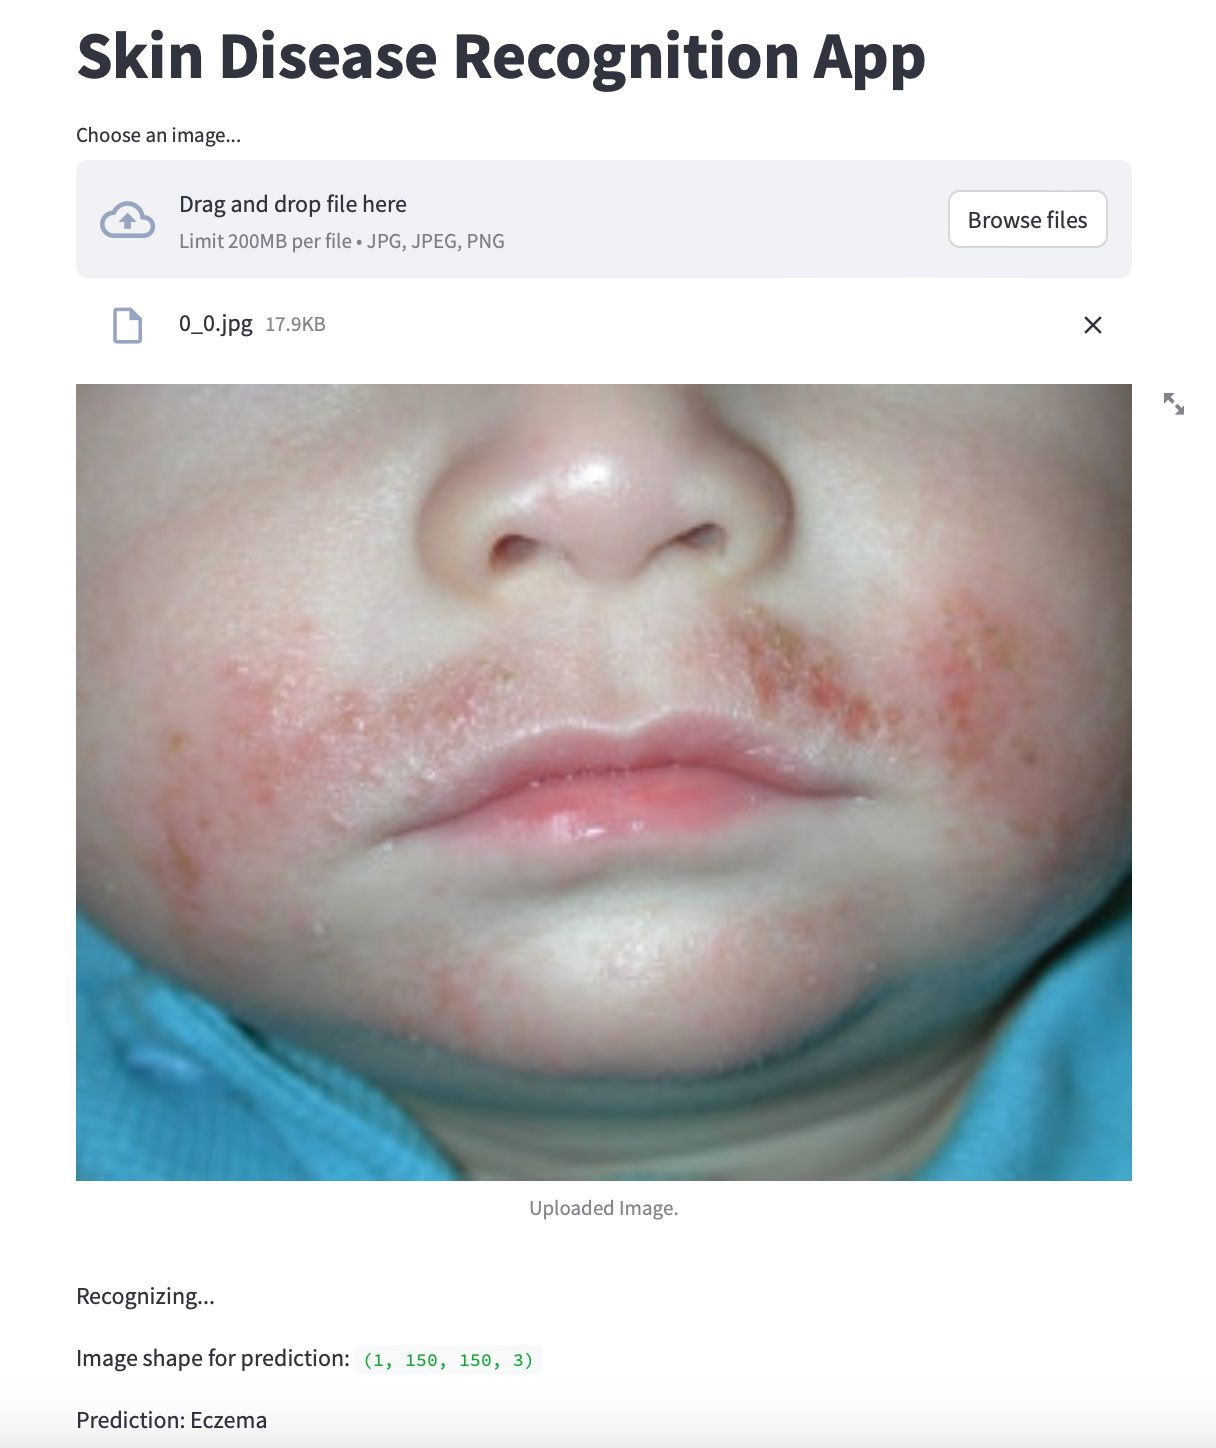

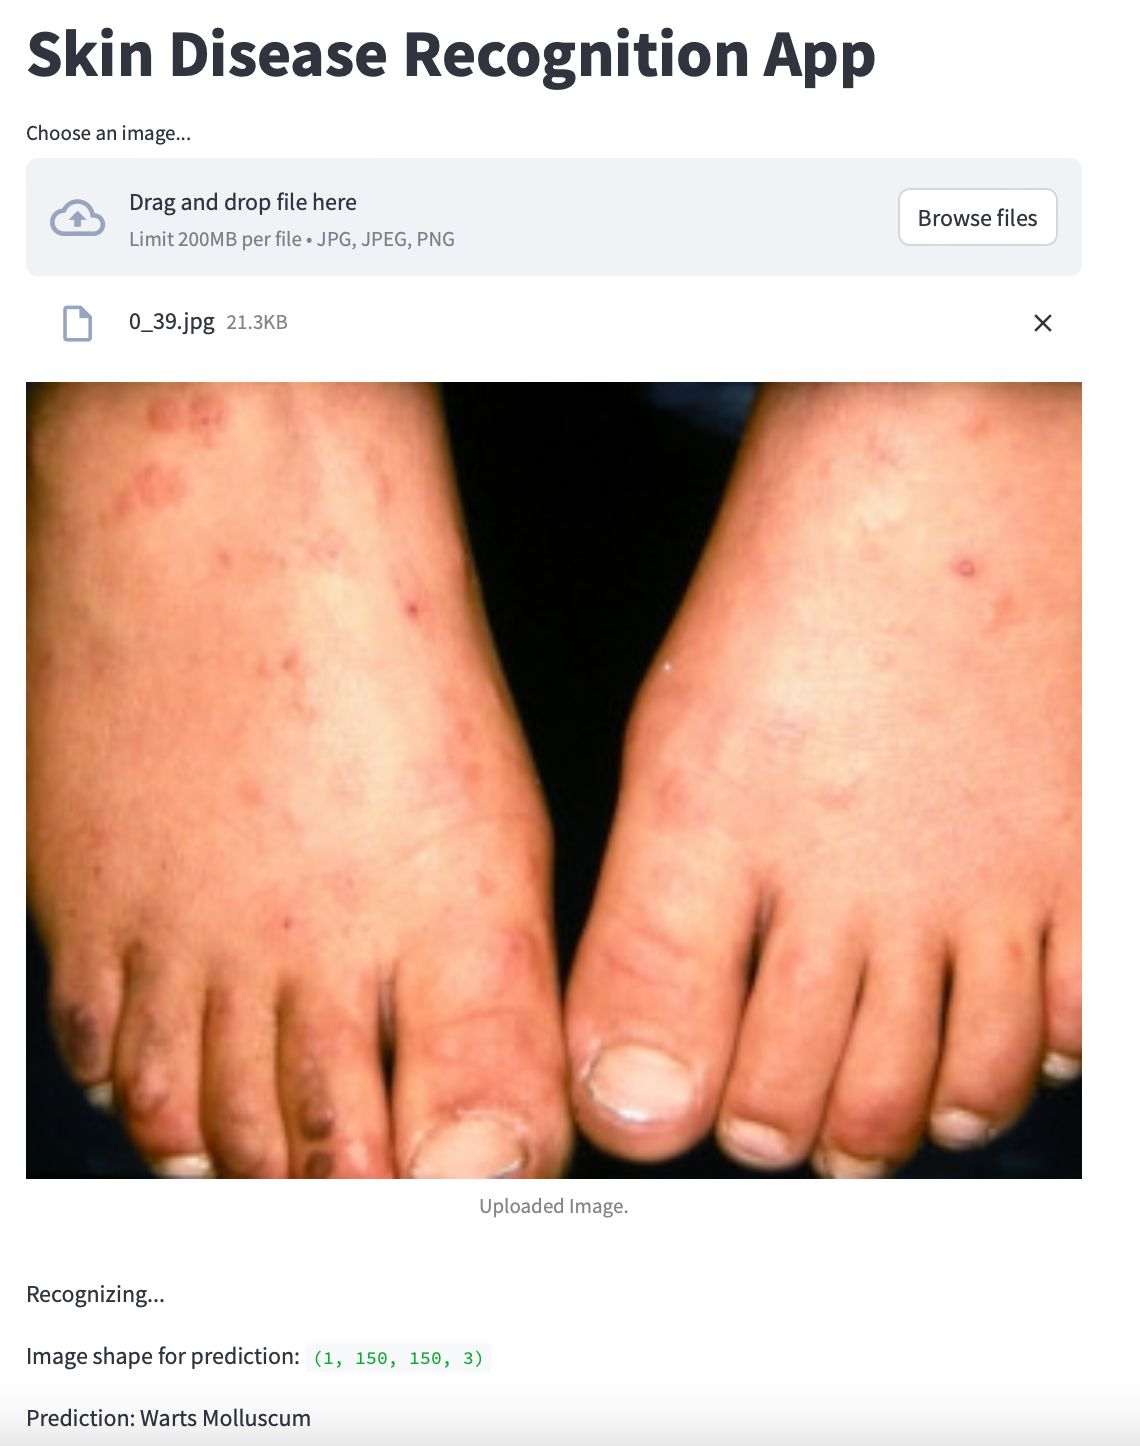

### **Visualizing the Data using PowerBI**

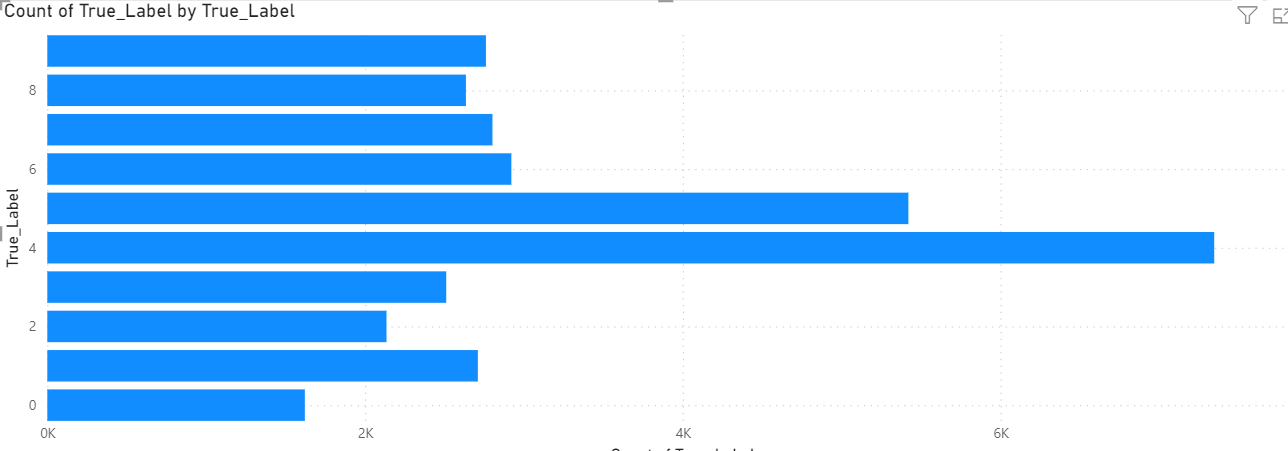

The above picture shows the count of images for a true label

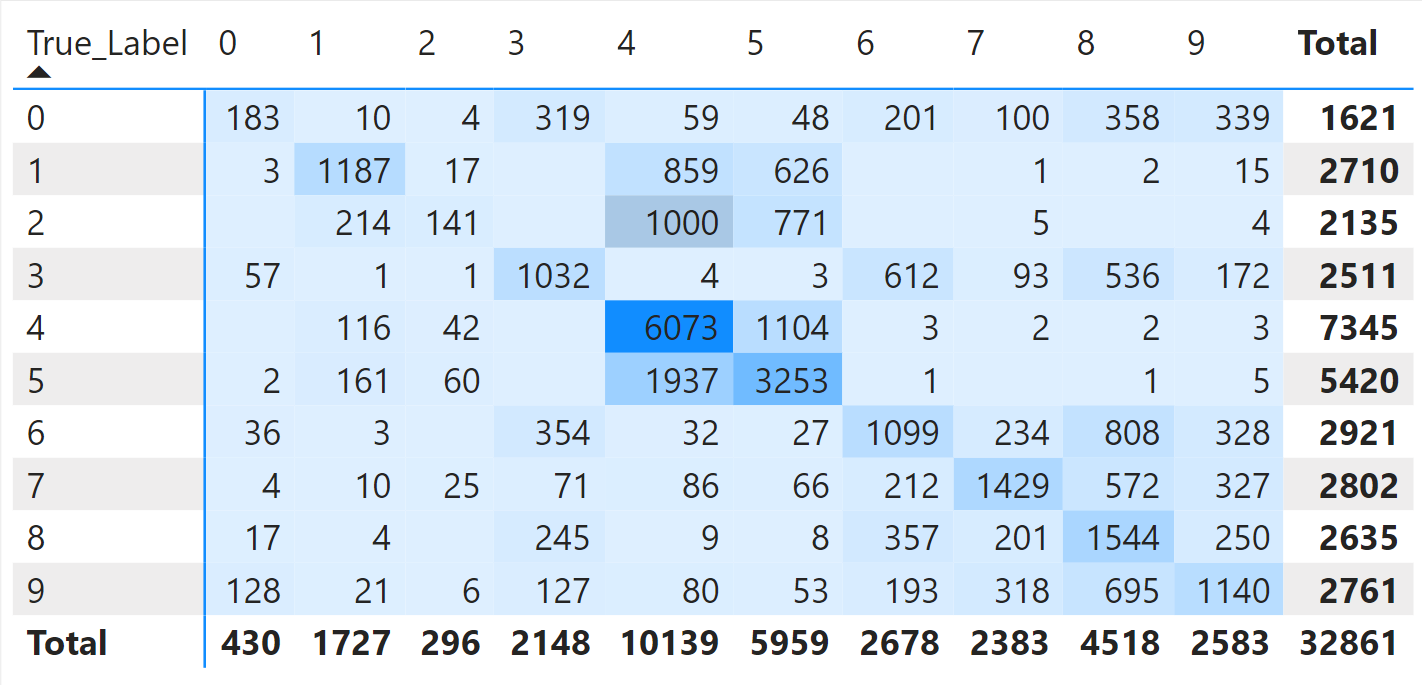

The above picture shows the number of images that are correctly predicted for a true label

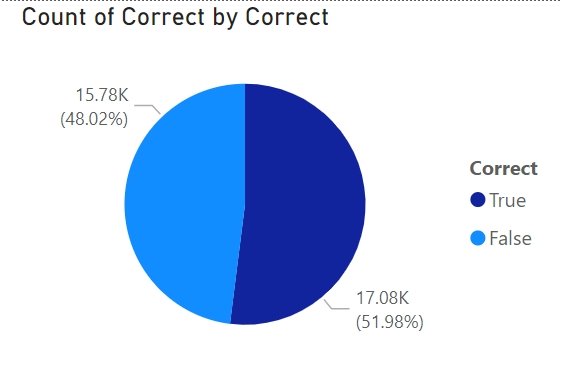

The above image shows the percentage of the images which are correctly identified

### **Conclusion**

1. Effectively classified skin disease images into ten distinct categories using a convolutional neural network (CNN), showcasing the model’s capabilities.​

2. Recorded a test dataset accuracy of 56.10%, highlighting opportunities for improved generalization across unseen data.​

3. Anticipate that refining the CNN architecture and allocating more computational resources will significantly enhance model performance.​

4. Utilized Apache Spark for data processing, MongoDB for data management, and Power BI for visualization, creating a scalable and robust solution.​

5. Developed a Streamlit web app for on-the-fly model testing and user engagement, extending the model’s practical usability.​